# **Performance Analysis of Facebook Ad Campaigns for Superhero U: Recommendations for Cost Optimization for GlobalShala**
- ## **Objectives**
-To Understand the available metrics
-To Define the key perfomance indicators
-To Analyse the campaign
-To identify and recommend atleast one or more ad campaigns for discontinuity

# **Import Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

# **Convert the dataset to a csv file format**

# **load the dataset**

In [ ]:
df=pd.read_csv("/content/Marketing Team Data.csv")
df.head(10)

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clic,Click-Through R,Unique Click-Thr,Amount Spent in,Cost Per Click (C,Cost per Result (,@dropdown,@dropdown.1
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,"$1,092.24",$2.24,$6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,$835.46,$1.73,$5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,$319.38,$1.61,$4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,$86.25,$1.76,$4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,"$1,193.94",$0.46,$1.09,NaN,NaN
5,Campaign 2,SHU3_ (Student,Students,13-17,Group 2 (Australi,14753,25705,1.742357,969,698,435,3.77,4.73,$299.51,$0.31,$0.69,NaN,NaN
6,Campaign 2,SHU3_ (Student,Students,25-34,Group 2 (Australi,2066,2447,1.184414,181,141,65,7.40,6.82,$85.57,$0.47,$1.32,NaN,NaN
7,Campaign 3,SHU_Students(A,Students,13-17,Australia,2271,2616,1.151915,61,55,28,2.33,2.42,$475.85,$7.80,$16.99,NaN,NaN
8,Campaign 3,SHU_Students(A,Students,18-24,Australia,704,734,1.042614,49,46,13,6.68,6.53,$283.17,$5.78,$21.78,NaN,NaN
9,Campaign 3,SHU_Students(A,Students,25-34,Australia,212,222,1.047170,9,8,3,4.05,3.77,$91.66,$10.18,$30.55,NaN,NaN


In [ ]:
df.shape

(33, 18)

In [ ]:
df.tail()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clic,Click-Through R,Unique Click-Thr,Amount Spent in,Cost Per Click (C,Cost per Result (,@dropdown,@dropdown.1
28,Campaign 10,SHU_Students(U,Students,18-24,UK,741,785,1.059379,39,34,20,4.97,4.59,$255.57,$6.55,$12.78,NaN,NaN
29,Campaign 10,SHU_Students(U,Students,25-34,UK,338,365,1.079882,13,11,4,3.56,3.25,$113.58,$8.74,$28.40,NaN,NaN
30,Campaign 11,SHU_Students (,Students,13-17,USA,2159,2465,1.141732,126,111,95,5.11,5.14,$691.28,$5.49,$7.28,NaN,NaN
31,Campaign 11,SHU_Students (,Students,18-24,USA,305,332,1.088525,43,37,28,12.95,12.13,$159.14,$3.70,$5.68,NaN,NaN
32,Campaign 11,SHU_Students (,Students,25-34,USA,91,103,1.131868,9,8,3,8.74,8.79,$47.26,$5.25,$15.75,NaN,NaN


# **Column-Rename**

In [ ]:
df.columns = [
    'campaign_id', 'campaign_name', 'audience', 'age', 'geography', 'reach',
    'impressions', 'frequency', 'clicks', 'unique_clicks', 'unique_link_clicks',
    'ctr', 'unique_ctr', 'amount_spent', 'cost_per_click', 'cost_per_result',
    'dropdown1', 'dropdown2'
]
df.head()

,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,dropdown1,dropdown2
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,"$1,092.24",$2.24,$6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,$835.46,$1.73,$5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,$319.38,$1.61,$4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,$86.25,$1.76,$4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,"$1,193.94",$0.46,$1.09,NaN,NaN


# **Clean numeric field**
- Convert currency and percentage fields to float:

In [ ]:
for col in ['amount_spent', 'cost_per_click', 'cost_per_result']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

for col in ['ctr', 'unique_ctr']:
    df[col] = df[col].astype(float)
df.head()


,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,dropdown1,dropdown2
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,1092.24,2.24,6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,835.46,1.73,5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,319.38,1.61,4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,86.25,1.76,4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,1193.94,0.46,1.09,NaN,NaN


# **Fix Misaligned Rows**

In [ ]:
df_clean = df.dropna(thresh=10)
df_clean.head()


,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,dropdown1,dropdown2
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,1092.24,2.24,6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,835.46,1.73,5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,319.38,1.61,4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,86.25,1.76,4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,1193.94,0.46,1.09,NaN,NaN


##  **Recompute metrics to validate**


In [ ]:
df_clean['calculated_ctr'] = (df_clean['clicks'] / df_clean['impressions']) * 100
df_clean['calculated_cpc'] = df_clean['amount_spent'] / df_clean['clicks']
df_clean.head()


,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,dropdown1,dropdown2,calculated_ctr,calculated_cpc
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,1092.24,2.24,6.07,NaN,NaN,2.091655,2.242793
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,835.46,1.73,5.43,NaN,NaN,3.086144,1.726157
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,319.38,1.61,4.91,NaN,NaN,3.151361,1.613030
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,86.25,1.76,4.11,NaN,NaN,2.592593,1.760204
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,1193.94,0.46,1.09,NaN,NaN,6.621384,0.460447


## Feature Description

| **Feature** | **Description** |
|-------------|------------------|
| `campaign_id`, `campaign_name` | Identifier and name of each campaign |
| `audience`, `age`, `geography` | Target audience characteristics |
| `reach`, `impressions`, `frequency` | Ad performance metrics:<br>• **Reach** – number of unique users who saw the ad <br>• **Impressions** – total number of times the ad was shown <br>• **Frequency** – average number of times the ad was shown per user |
| `clicks`, `unique_clicks`, `unique_link_clicks` | Engagement metrics:<br>• **Clicks** – total clicks on the ad <br>• **Unique Clicks** – number of individual users who clicked <br>• **Unique Link Clicks** – distinct users who clicked the main link |
| `ctr`, `unique_ctr` | Click-through rates:<br>• **CTR** – (clicks ÷ impressions) × 100 <br>• **Unique CTR** – (unique clicks ÷ impressions) × 100 |
| `amount_spent` | Total budget spent on a specific campaign segment |
| `cost_per_click`, `cost_per_result`, `calculated_cpc` | Cost efficiency metrics:<br>• **Cost Per Click (CPC)** – average cost for each click <br>• **Cost Per Result** – cost per outcome (e.g., signup) <br>• **Calculated CPC** – additional verification CPC calculation |
| `calculated_ctr` | An alternate computation of the click-through rate for validation |

## **DataFrame Structure Overview**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         33 non-null     object 
 1   campaign_name       33 non-null     object 
 2   audience            33 non-null     object 
 3   age                 33 non-null     object 
 4   geography           33 non-null     object 
 5   reach               33 non-null     int64  
 6   impressions         33 non-null     int64  
 7   frequency           33 non-null     float64
 8   clicks              33 non-null     int64  
 9   unique_clicks       33 non-null     int64  
 10  unique_link_clicks  33 non-null     int64  
 11  ctr                 33 non-null     float64
 12  unique_ctr          33 non-null     float64
 13  amount_spent        33 non-null     float64
 14  cost_per_click      33 non-null     float64
 15  cost_per_result     33 non-null     float64
 16  dropdown1 

# **Drop empty columns**

In [ ]:
df_clean.drop(columns=['dropdown1', 'dropdown2'], inplace=True)
df_clean.head()


,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,calculated_ctr,calculated_cpc
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,1092.24,2.24,6.07,2.091655,2.242793
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,835.46,1.73,5.43,3.086144,1.726157
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,319.38,1.61,4.91,3.151361,1.613030
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,86.25,1.76,4.11,2.592593,1.760204
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,1193.94,0.46,1.09,6.621384,0.460447


# **Check for duplicates**

In [ ]:
duplicates =df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# **Explore the missing values**

In [ ]:
df_clean.isnull().sum()

,0
campaign_id,0
campaign_name,0
audience,0
age,0
geography,0
reach,0
impressions,0
frequency,0
clicks,0
unique_clicks,0


# **Standardize the columns names**

In [ ]:
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')
df_clean.head()


,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,calculated_ctr,calculated_cpc
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,1092.24,2.24,6.07,2.091655,2.242793
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,835.46,1.73,5.43,3.086144,1.726157
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,319.38,1.61,4.91,3.151361,1.613030
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,86.25,1.76,4.11,2.592593,1.760204
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,1193.94,0.46,1.09,6.621384,0.460447


# **Exploratory data analysis**
## **Campaign performance analysis**
- Group and Aggregate Campaign Performance by campaign name


In [ ]:
campaign_summary = df_clean.groupby('campaign_name').agg({
    'amount_spent': 'sum',
    'clicks': 'sum',
    'impressions': 'sum',
    'reach': 'sum',
    'ctr': 'mean',
    'cost_per_click': 'mean',
    'calculated_ctr': 'mean',
    'calculated_cpc': 'mean'
}).sort_values(by='amount_spent', ascending=False).reset_index()

# Display summary table
campaign_summary


,campaign_name,amount_spent,clicks,impressions,reach,ctr,cost_per_click,calculated_ctr,calculated_cpc
0,SHU_Students (,2764.42,3114,36141,27791,8.100000,3.554444,8.099778,3.554855
1,SHU_6 (Educato,2333.33,1218,47139,23904,2.730000,1.835000,2.730438,1.835546
2,SHU_Students(U,1732.93,363,12751,10969,3.136667,5.518333,3.136541,5.518295
3,SHU3_ (Student,1579.02,3743,67313,46494,5.930000,0.413333,5.929297,0.414101
4,SHU_Students(N,1035.24,1420,65215,29668,2.233333,0.723333,2.231162,0.722242
5,SHU_Students (I,955.21,1400,37246,31831,4.305000,0.675000,4.303563,0.674406
6,SHU_Students(A,850.68,119,3572,3187,4.353333,7.920000,4.353869,7.921415
7,SHU_Students(G,837.78,648,20483,15024,3.363333,1.283333,3.363691,1.283677


# **Total Amount Spent vs Clicks per Campaign**

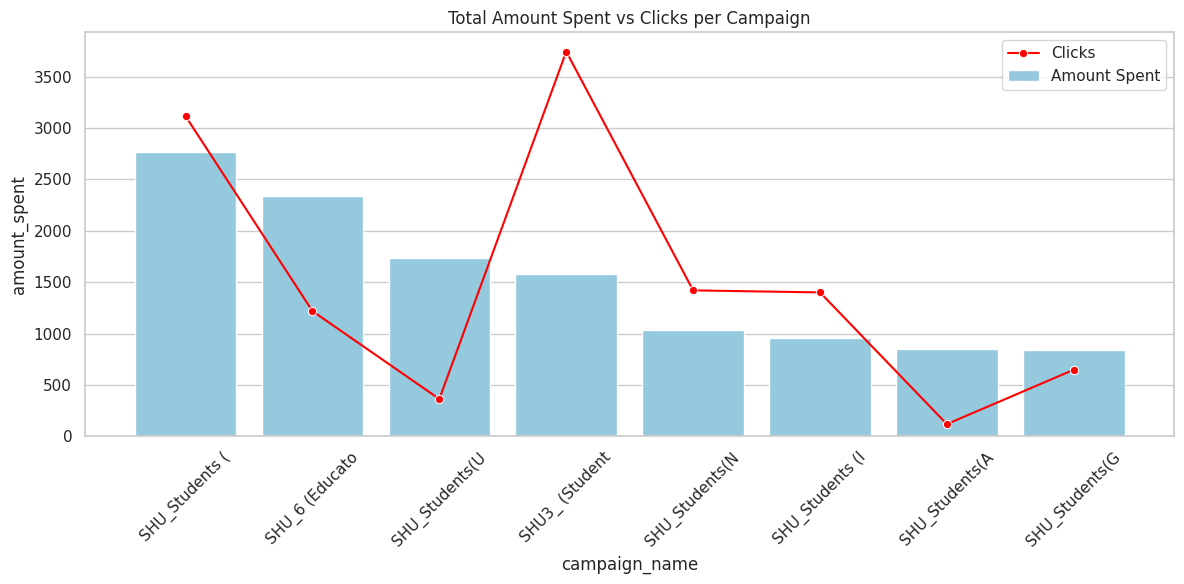

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_summary, x='campaign_name', y='amount_spent', color='skyblue', label='Amount Spent')
sns.lineplot(data=campaign_summary, x='campaign_name', y='clicks', color='red', marker='o', label='Clicks')

plt.title('Total Amount Spent vs Clicks per Campaign')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### **Campaign Performance Insights**

####  Underperforming Campaigns

**SHU_Students (U)**  
- **High spend** (~1,700)  
- **Very low clicks** (~360)  
- ➤ **Underperforming**: High cost with little engagement.

**SHU_Students (A)**  
- **Medium spend** (~850)  
- **Very low clicks** (~119)  
- ➤ **Also likely underperforming** despite moderate spend.

---

####  Efficient Campaign

**SHU3_ (Student)**  
- **Moderate spend** (~1,600)  
- **Extremely high clicks** (~3,700)  
- ➤ **Highly efficient performer**: Strong engagement with reasonable spend.


# **CTR vs Cost Per Click**

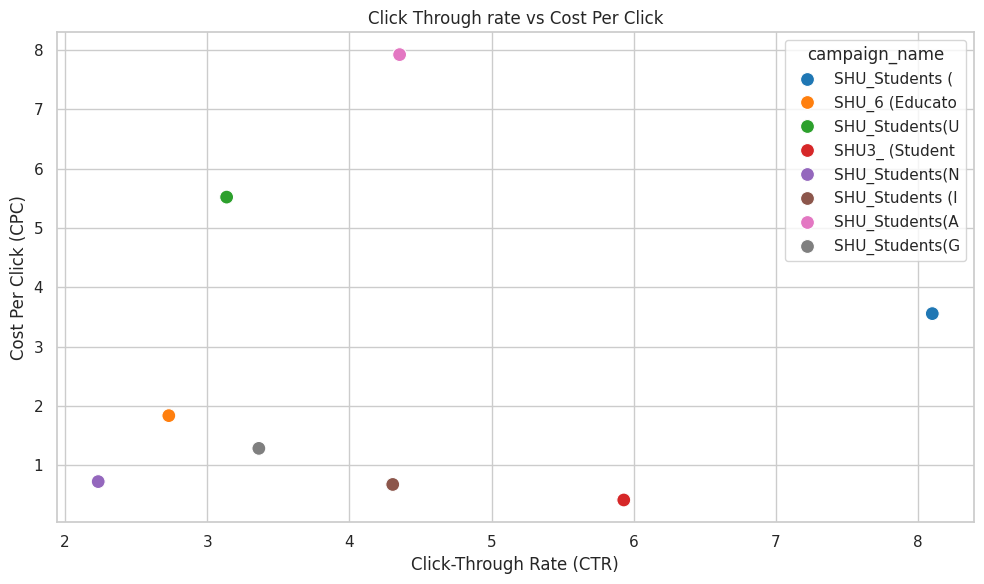

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaign_summary, x='ctr', y='cost_per_click', hue='campaign_name', palette='tab10', s=100)

plt.title('Click Through rate vs Cost Per Click')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Cost Per Click (CPC)')
plt.tight_layout()
plt.show()


### Campaign Performance Analysis

####  Underperforming Campaigns

**SHU_Students (U)**  
- **Spend**: 1,700  
- **Clicks**: 360  
- **CTR**: 3.1%  
- **CPC**: 5.5  
- ➤ **Underperforming**: High cost per click and low engagement.

**SHU_Students (A)**  
- **Spend**: 850  
- **Clicks**: 119  
- **CTR**: 4.8%  
- **CPC**: 8.0  
- ➤ **Very high CPC** for few clicks – poor cost efficiency.

---

#### Top Performing Campaign

**SHU3_ (Student)**  
- **Spend**: 1,600  
- **Clicks**: 3,700  
- **CTR**: 5.9%  
- **CPC**: 0.45  
- ➤ **Highly efficient**: Strong engagement at a very low cost per click.

---

#### Additional Observations

- **SHU_Students ( )**  
  - **Highest CTR**: 8.2%  
  - **CPC**: 3.4  
  - ➤ **Good engagement**, but CPC could be improved.

- **SHU_6 (Educato...)** and **SHU_Students(G)**  
  - CTRs around 2.5%–3.5%, with moderate CPC (~1.2–1.8).  
  - ➤ **Moderate performance**, room for optimization.

- **SHU_Students(I)**  
  - **CTR**: 4.3%, **CPC**: 0.7  
  - ➤ **Cost-efficient**, potential for scaling.

- **SHU_Students(N)**  
  - **Low CTR**: 2.2%, **CPC**: 0.7  
  - ➤ Low engagement despite low cost.




# **Impressions vs Unique Clicks**

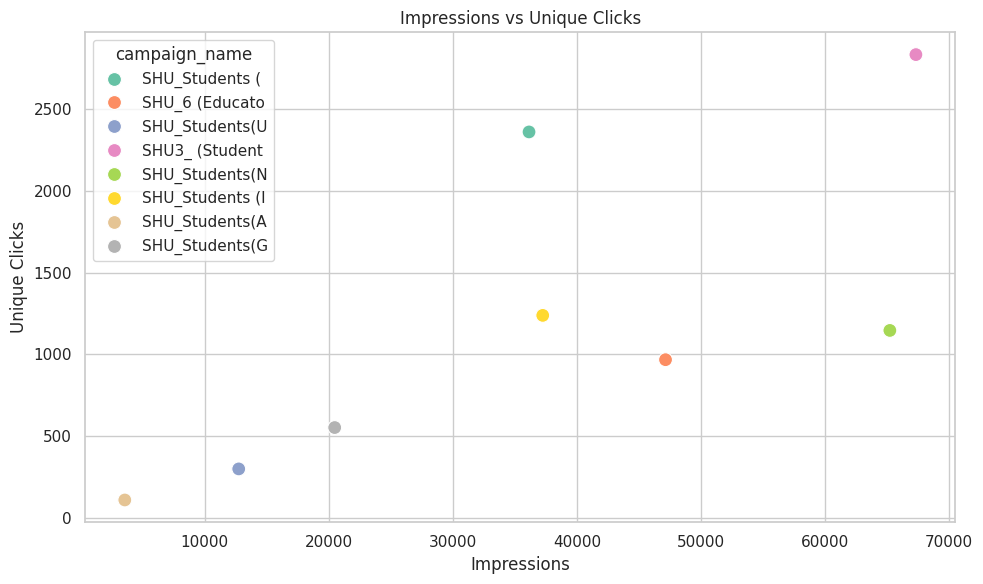

In [ ]:
if 'unique_clicks' in df_clean.columns:
    clicks_df = df.groupby('campaign_name')['unique_clicks'].sum().reset_index()
    merged = campaign_summary.merge(clicks_df, on='campaign_name', how='left')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged, x='impressions', y='unique_clicks', hue='campaign_name', palette='Set2', s=100)

    plt.title('Impressions vs Unique Clicks')
    plt.xlabel('Impressions')
    plt.ylabel('Unique Clicks')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'unique_clicks' not found in the dataset.")


## Top Performing Campaign
- SHU3_ (Student)

- Impressions: ~67,000

- Unique Clicks: ~2,750

➤ Outstanding engagement: Highest impressions and clicks overall — very effective campaign reach.

## High Potential Campaigns
- SHU_Students ( )

- Impressions: ~38,000

- Unique Clicks: ~2,350

➤ Strong click response relative to impressions — high CTR potential.

## SHU_Students (I)

- Impressions: ~37,000

- Unique Clicks: ~1,250

➤ Decent performance — consider optimization to improve CTR further.


# **Age or geography impact**

In [ ]:
# Group by age and calculate mean CTR and CPC
age_group_stats = df_clean.groupby('age').agg({
    'ctr': 'mean',
    'cost_per_click': 'mean',
    'amount_spent': 'sum'
}).reset_index()
age_group_stats

,age,ctr,cost_per_click,amount_spent
0,13-17,3.331111,3.424444,3258.30
1,18-24,6.027000,2.967000,4952.19
2,25-34,5.437273,3.565455,2637.03
3,35-44,3.090000,1.730000,835.46
4,45-54,3.150000,1.610000,319.38
5,55-64,2.590000,1.760000,86.25


In [ ]:
# Group by geography and calculate mean CTR and total spend
geo_stats = df_clean.groupby('geography').agg({
    'ctr': 'mean',
    'cost_per_click': 'mean',
    'amount_spent': 'sum'
}).reset_index()
geo_stats

,geography,ctr,cost_per_click,amount_spent
0,Australia,4.353333,7.920000,850.68
1,Canada,5.513333,5.503333,923.96
2,Ghana,3.363333,1.283333,837.78
3,Group 1 (Australi,2.730000,1.835000,2333.33
4,Group 2 (Australi,5.930000,0.413333,1579.02
5,India,4.305000,0.675000,955.21
6,Nepal,2.233333,0.723333,1035.24
7,Nigeria,9.853333,0.346667,942.78
8,UAE,2.646667,3.583333,876.26
9,UK,3.626667,7.453333,856.67


 # **Age Group Performance (CTR and CPC)**

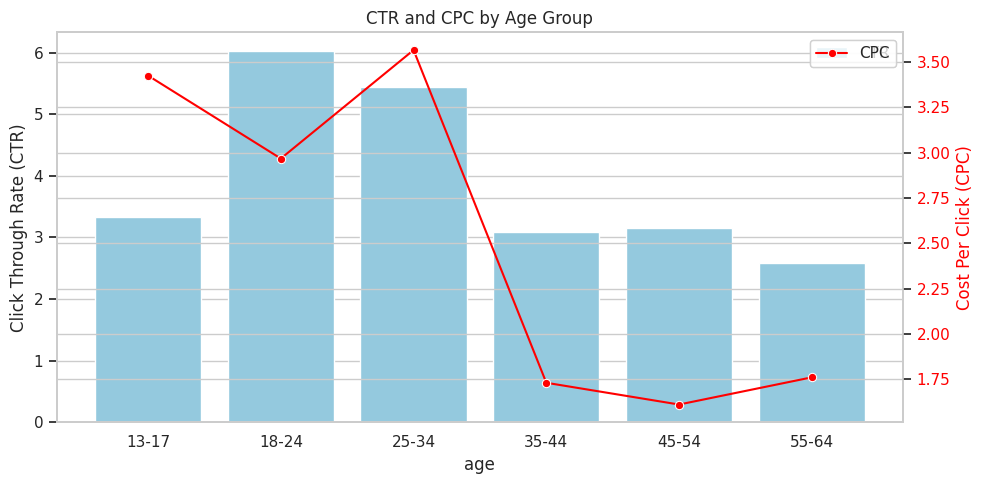

In [ ]:
# Set style
sns.set(style='whitegrid')

# Create a barplot for CTR and CPC by age
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barplot for CTR
sns.barplot(x='age', y='ctr', data=age_group_stats, color='skyblue', label='CTR', ax=ax1)
ax1.set_ylabel('Click Through Rate (CTR)')
ax1.set_title('CTR and CPC by Age Group')

# Create a second y-axis for CPC
ax2 = ax1.twinx()
sns.lineplot(x='age', y='cost_per_click', data=age_group_stats, color='red', marker='o', label='CPC', ax=ax2)
ax2.set_ylabel('Cost Per Click (CPC)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


## 18-24
Top performer Highest CTR and investment; efficient CPC.
## 25-34
Strong engagement, but higher CPC — still worthwhile.
## 13-17
High cost for lower CTR — may need targeting/content adjustment.
## 35-44
Lowest CPC — efficient budget use despite lower CTR.
## 45-44
Small budget, low CPC — potential for scale if CTR improves.
## 55-64
Least responsive group — consider excluding or retargeting.

# **Spend and CTR by Geography**

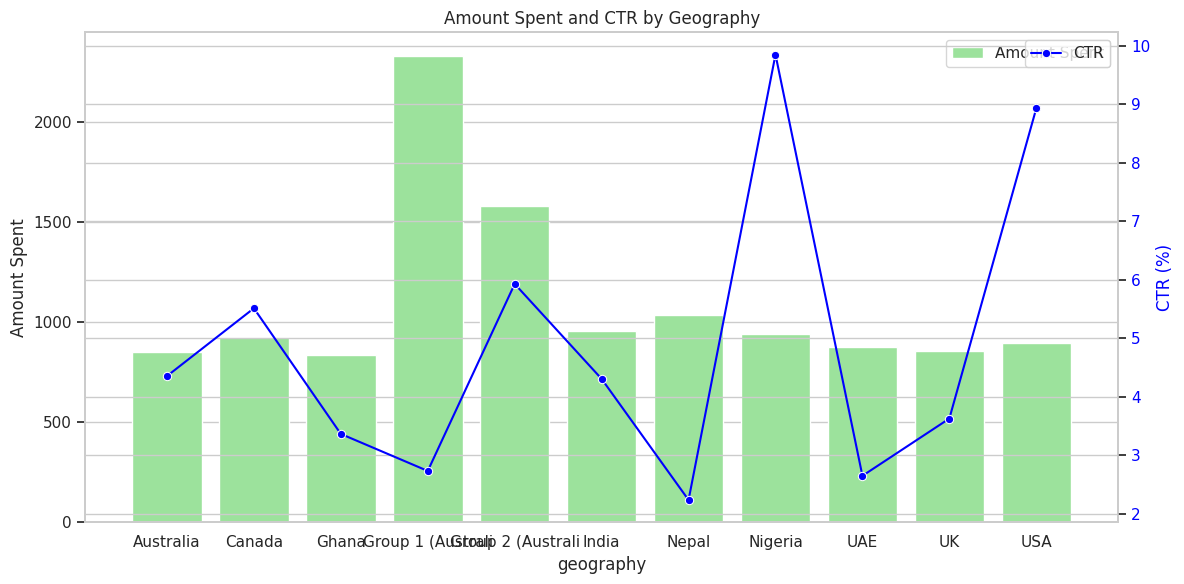

In [ ]:
# Barplot for amount spent and CTR
fig, ax = plt.subplots(figsize=(12, 6))

# Plot amount spent
sns.barplot(x='geography', y='amount_spent', data=geo_stats, color='lightgreen', label='Amount Spent', ax=ax)
ax.set_ylabel('Amount Spent')
ax.set_title('Amount Spent and CTR by Geography')

# Plot CTR on a secondary y-axis
ax2 = ax.twinx()
sns.lineplot(x='geography', y='ctr', data=geo_stats, color='blue', marker='o', label='CTR', ax=ax2)
ax2.set_ylabel('CTR (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Nigeria
- Best performer Exceptional CTR and ultra-low CPC.
## USA
-High CTR, but amount is relatively high — strong engagement.
## Group2(Australia)
-Excellent CTR and very low CPC — strong ROI potential.
## Canada
- Good CTR, but CPC is expensive — optimize bidding/ads.
## India
- Good value — strong engagement with low cost.
## Australia
- High CPC with moderate CTR — expensive market.
## UK
- High cost, average CTR — similar to Australia.
## Ghana
- Cost-effective — low CPC with moderate CTR.
## Group1(Australia)
- Low CTR with high total spend — needs urgent review.
## UAE
- Low CTR and above-average CPC — not cost-effective.
## Nepal
- Low CTR despite affordable CPC — review targeting/creative.